#
**VIF - Fator de Inflação de Variância**

In [19]:
#Importar bibliotecas
import pandas as pd
import geopandas as gpd

#Importar dataframe valores das variáveis preditoras coletadas via pontos amostrais
pvals_df = pd.read_csv("C:\\Users\\Alisson Medeiros\\tese_cap2\\MDE_GEE\\Pixel_Values.csv")

#Eliminar colunas que não serão usadas
pvals_df = pvals_df.drop(columns=['.geo', 'system:index'])

In [20]:
#Correlação de Spearman
corrS = pvals_df.corr(method = 'spearman')

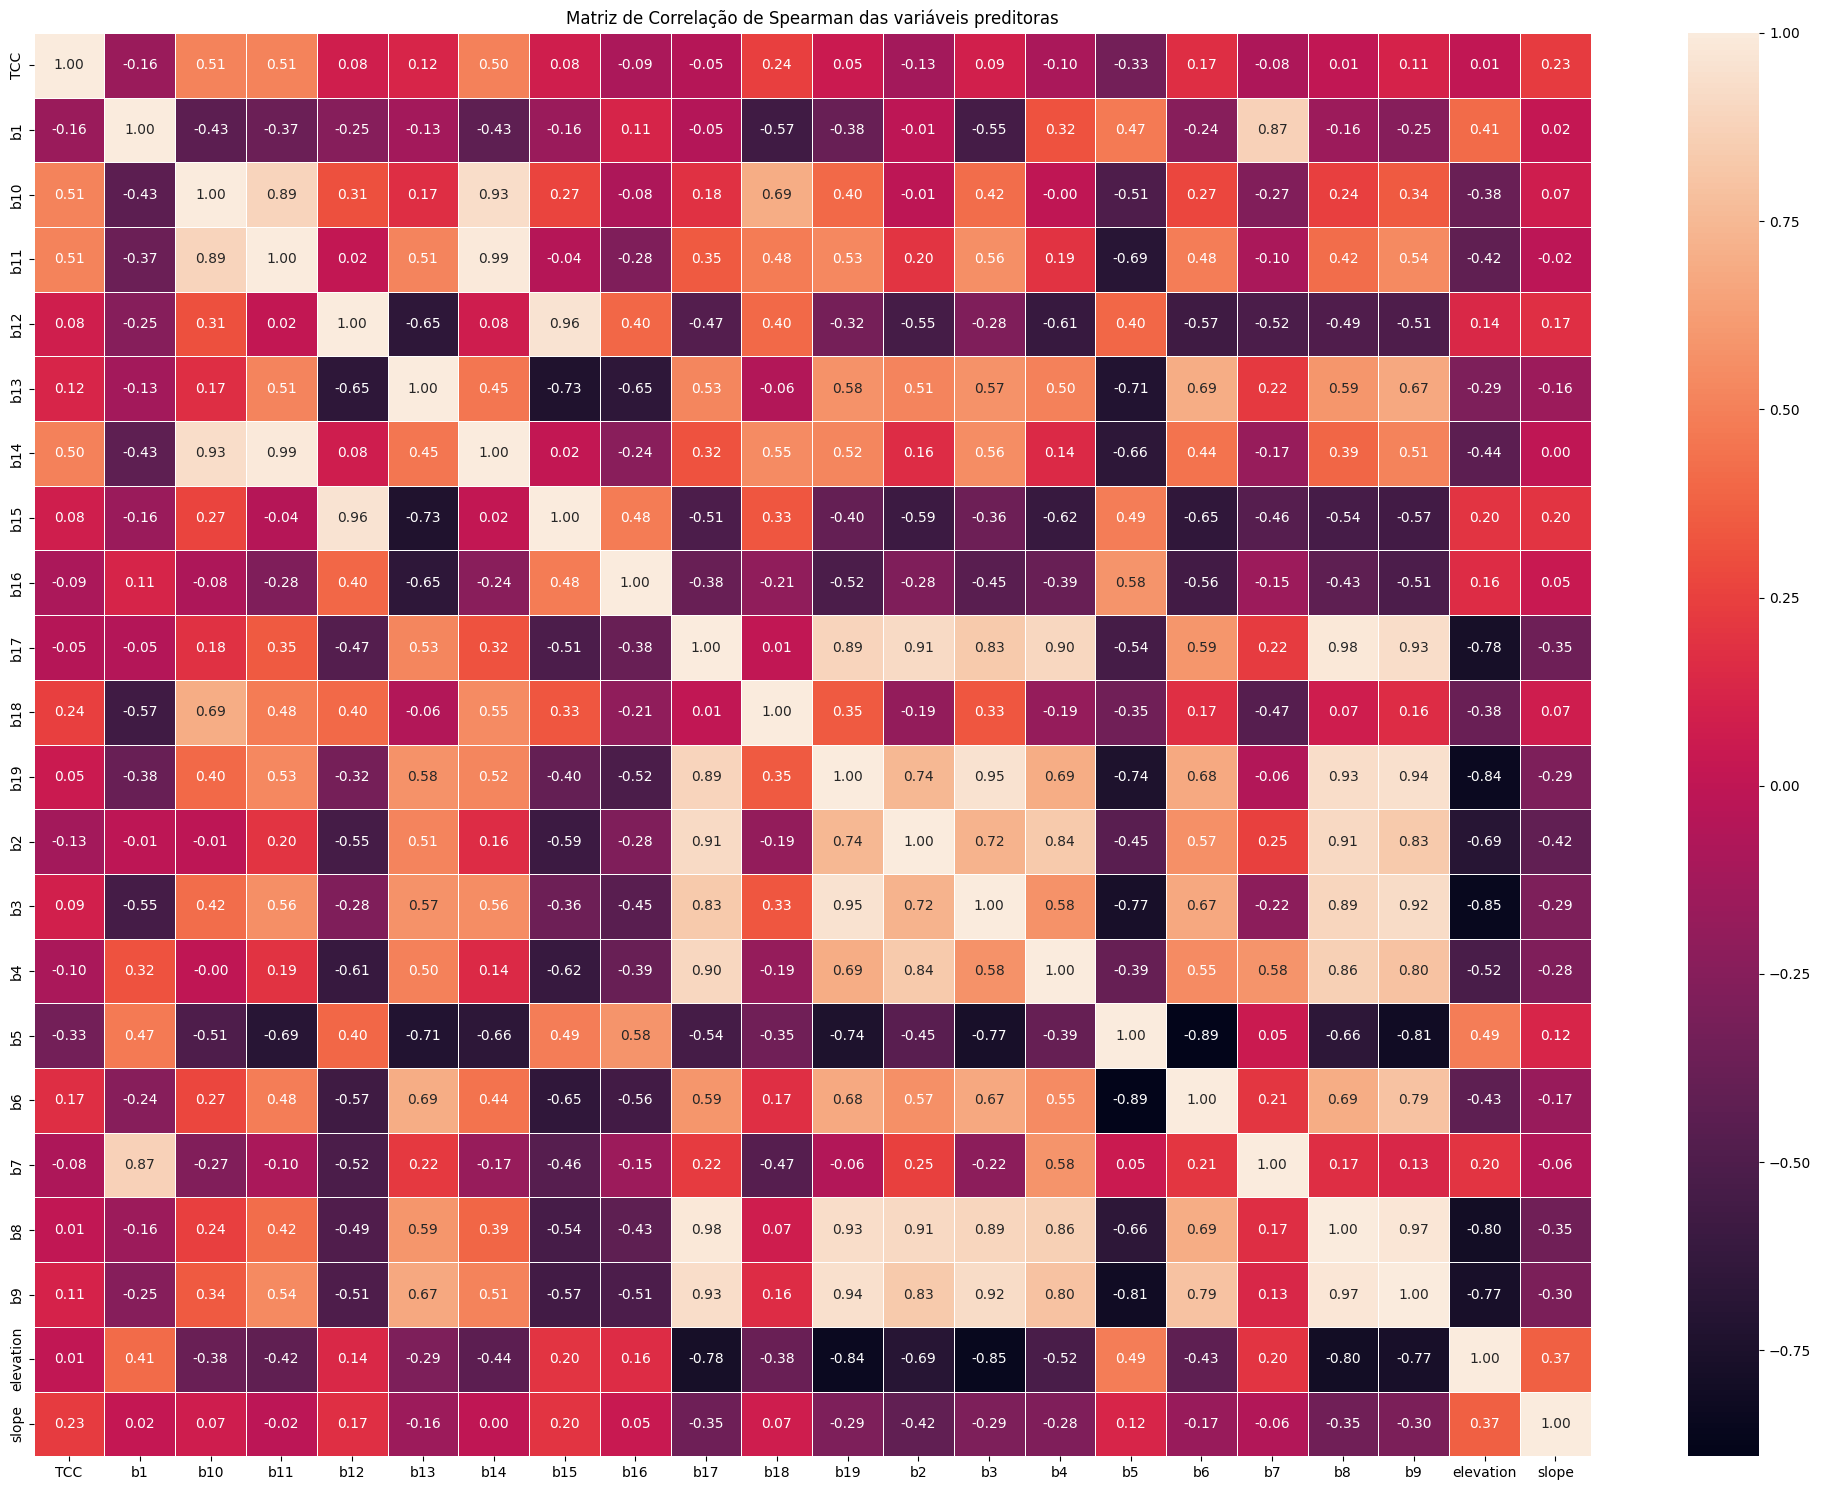

In [21]:
#Importar bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

#Plotar gráfico
plt.figure(figsize=(20, 15))
sns.heatmap(corrS, annot = True, fmt=".2f", linewidths=0.5,); #fmt=".2f" reduz o número de casas, linewidths=0.5 ajusta espaçamento entre as células,
plt.title("Matriz de Correlação de Spearman das variáveis preditoras")
plt.tight_layout()
plt.savefig('Spearman_heatmap_plot.png')
plt.show()

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Filtrar variáveis preditoras com base no  Fator de Inflação de Variância (VIF)
def filtrar_var_por_vif(pvals_df, threshold=10):

    original_columns = pvals_df.columns.tolist()
    remaining_columns = original_columns[:]
    
    while True:
        vif_data = pvals_df[remaining_columns]
        vif_values = [
            variance_inflation_factor(vif_data.values, i)
            for i in range(vif_data.shape[1])
        ]

        max_vif_index = vif_values.index(max(vif_values))
        max_vif = max(vif_values)

        if max_vif < threshold:
            break

        print(f"Removing '{remaining_columns[max_vif_index]}' with VIF {max_vif:.2f}")

        del remaining_columns[max_vif_index]
        
    filtered_data = pvals_df[remaining_columns]
    bands = filtered_data.columns.tolist()
    print("Bands:", bands)

    return filtered_data, bands

In [23]:
filtered_pvals_df, bands = filtrar_var_por_vif(pvals_df)
#Resultado Bands: ['TCC', 'b12', 'b16', 'b18', 'elevation', 'slope']

Removing 'b4' with VIF 900719925474099.25
Removing 'b17' with VIF 425329.11
Removing 'b8' with VIF 177644.17
Removing 'b9' with VIF 49845.09
Removing 'b1' with VIF 9157.74
Removing 'b3' with VIF 4002.18
Removing 'b2' with VIF 2572.75
Removing 'b14' with VIF 2326.18
Removing 'b6' with VIF 1518.11
Removing 'b10' with VIF 692.60
Removing 'b19' with VIF 255.76
Removing 'b13' with VIF 111.66
Removing 'b15' with VIF 83.90
Removing 'b7' with VIF 55.51
Removing 'b5' with VIF 11.91
Removing 'b11' with VIF 10.49
Bands: ['TCC', 'b12', 'b16', 'b18', 'elevation', 'slope']


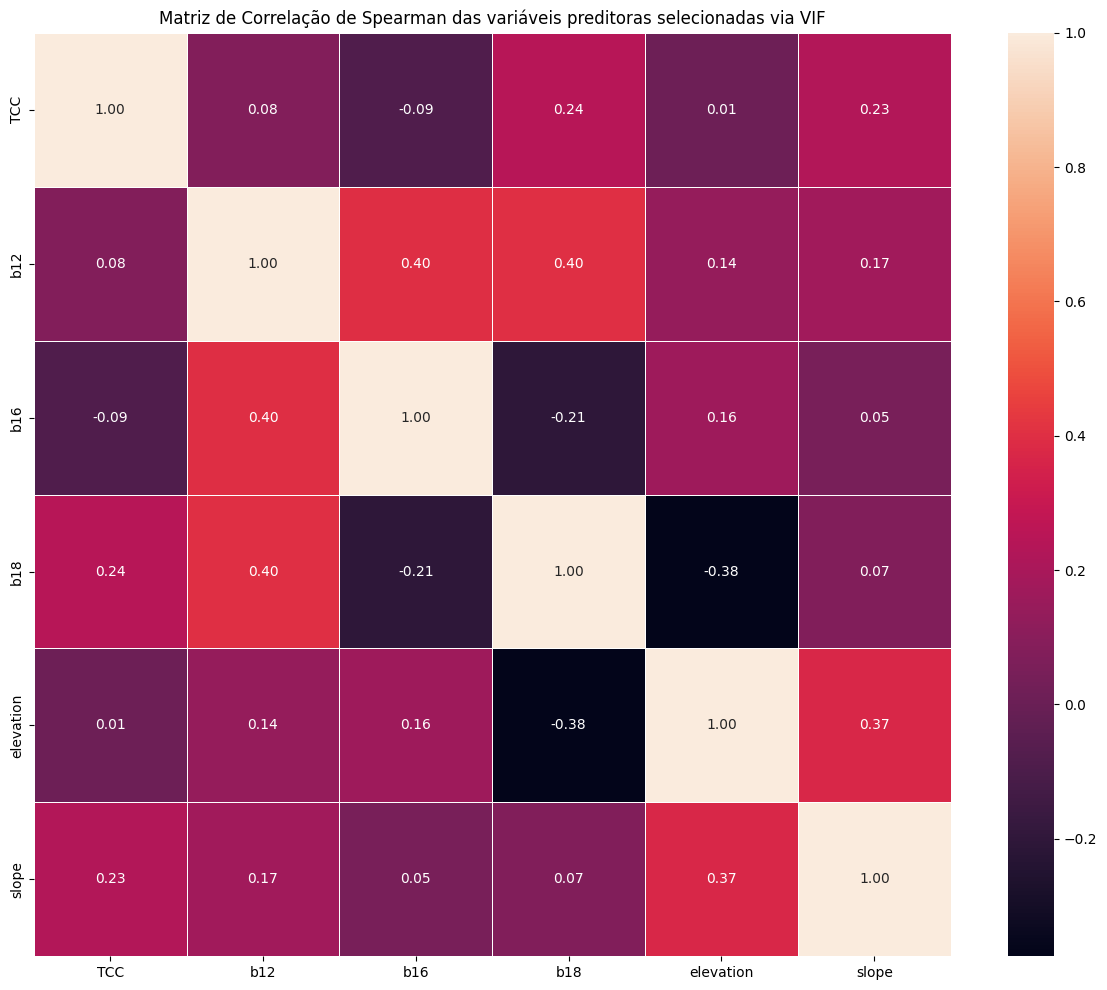

In [24]:
#Importar bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

#Correlação de Spearman das variáveis selecionadas
corrS_s = filtered_pvals_df.corr(method = 'spearman')

#Plotar gráfico
plt.figure(figsize=(12, 10))
sns.heatmap(corrS_s, annot = True, fmt=".2f", linewidths=0.5,); #fmt=".2f" reduz o número de casas, linewidths=0.5 ajusta espaçamento entre as células,
plt.title("Matriz de Correlação de Spearman das variáveis preditoras selecionadas via VIF")
plt.tight_layout()
plt.savefig('Spearman_heatmap_plot_variáveis_selecionadas_VIF.png')
plt.show()

In [7]:
#Importar bibliotecas
import pandas as pd
import geopandas as gpd

#Importar dataframe dos gêneros para todo o NE Setentrional
pvals_df = pd.read_csv("C:\\Users\\Alisson Medeiros\\tese_cap2\\MDE_GEE\\Pixel_Values_600m.csv")

#Eliminar colunas que não serão usadas
pvals_df = pvals_df.drop(columns=['.geo', 'system:index'])

In [8]:
#Correlação de Spearman
corrS = pvals_df.corr(method = 'spearman')

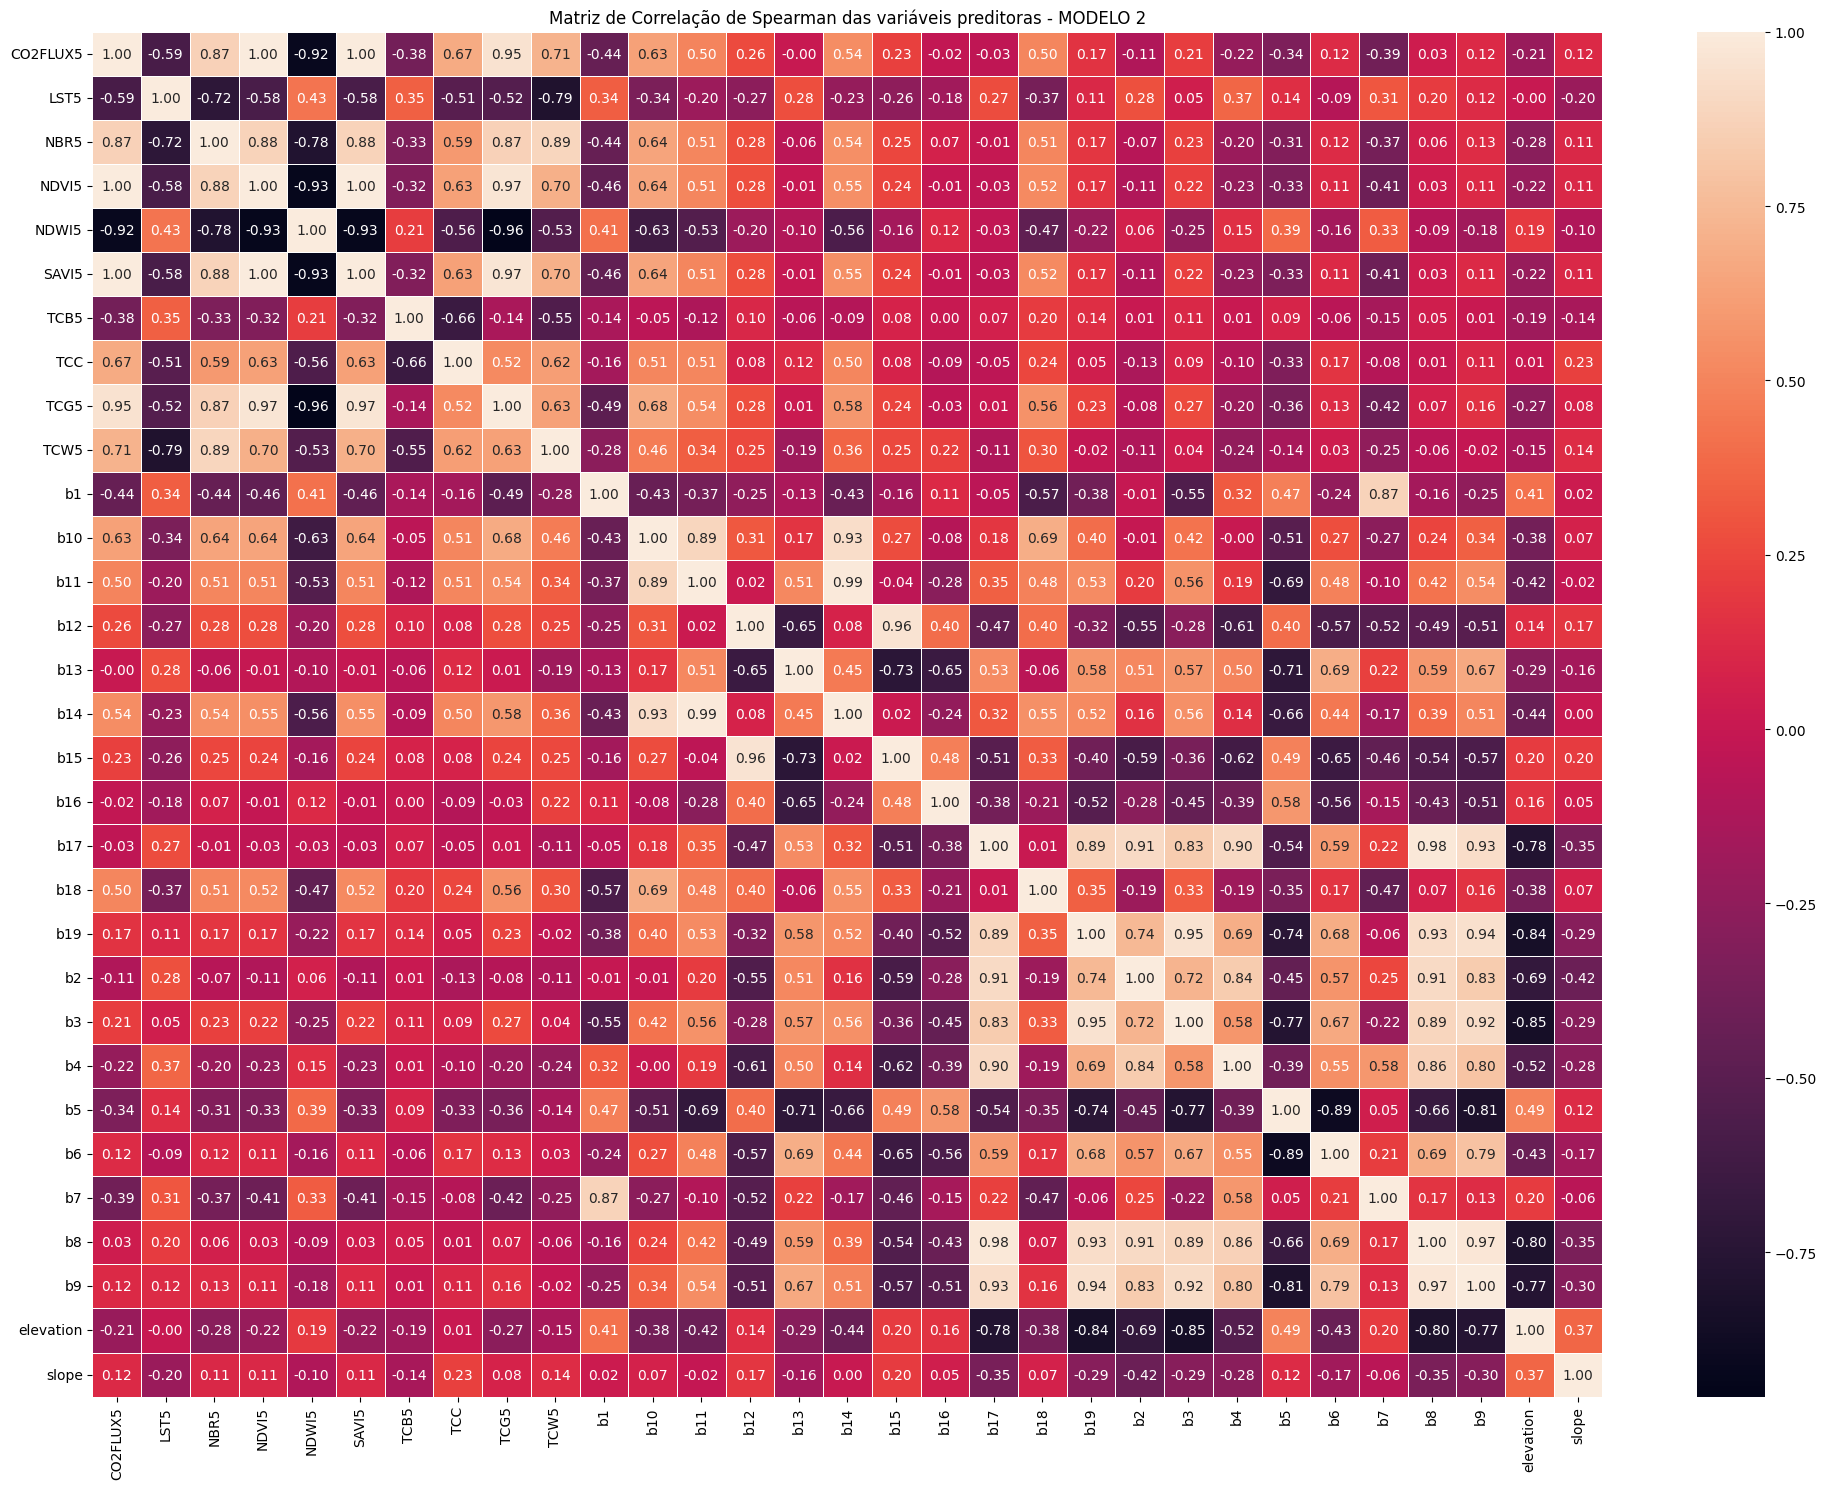

In [9]:
#Importar bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

#Plotar gráfico
plt.figure(figsize=(20, 15))
sns.heatmap(corrS, annot = True, fmt=".2f", linewidths=0.5,); #fmt=".2f" reduz o número de casas, linewidths=0.5 ajusta espaçamento entre as células,
plt.title("Matriz de Correlação de Spearman das variáveis preditoras - MODELO 2")
plt.tight_layout()
plt.savefig('M2_Spearman_heatmap_plot.png')
plt.show()

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Filtrar variáveis preditoras com base no  Fator de Inflação de Variância (VIF)
def filtrar_var_por_vif(pvals_df, threshold=10):

    original_columns = pvals_df.columns.tolist()
    remaining_columns = original_columns[:]
    
    while True:
        vif_data = pvals_df[remaining_columns]
        vif_values = [
            variance_inflation_factor(vif_data.values, i)
            for i in range(vif_data.shape[1])
        ]

        max_vif_index = vif_values.index(max(vif_values))
        max_vif = max(vif_values)

        if max_vif < threshold:
            break

        print(f"Removing '{remaining_columns[max_vif_index]}' with VIF {max_vif:.2f}")

        del remaining_columns[max_vif_index]
        
    filtered_data = pvals_df[remaining_columns]
    bands = filtered_data.columns.tolist()
    print("Bands:", bands)

    return filtered_data, bands

In [11]:
filtered_pvals_df, bands = filtrar_var_por_vif(pvals_df)

Removing 'NDVI5' with VIF 4503599627370496.00
Removing 'b4' with VIF 900719925474099.25
Removing 'b17' with VIF 446122.99
Removing 'b8' with VIF 183529.13
Removing 'b9' with VIF 52440.63
Removing 'b1' with VIF 10785.97
Removing 'SAVI5' with VIF 7555.79
Removing 'b3' with VIF 4538.39
Removing 'b2' with VIF 2710.87
Removing 'b14' with VIF 2404.75
Removing 'b6' with VIF 1978.40
Removing 'b19' with VIF 799.01
Removing 'b10' with VIF 707.93
Removing 'LST5' with VIF 533.20
Removing 'NDWI5' with VIF 432.43
Removing 'b13' with VIF 180.28
Removing 'TCB5' with VIF 154.79
Removing 'CO2FLUX5' with VIF 131.60
Removing 'b15' with VIF 84.87
Removing 'b7' with VIF 82.61
Removing 'b11' with VIF 32.00
Removing 'b5' with VIF 19.96
Removing 'NBR5' with VIF 14.74
Bands: ['TCC', 'TCG5', 'TCW5', 'b12', 'b16', 'b18', 'elevation', 'slope']


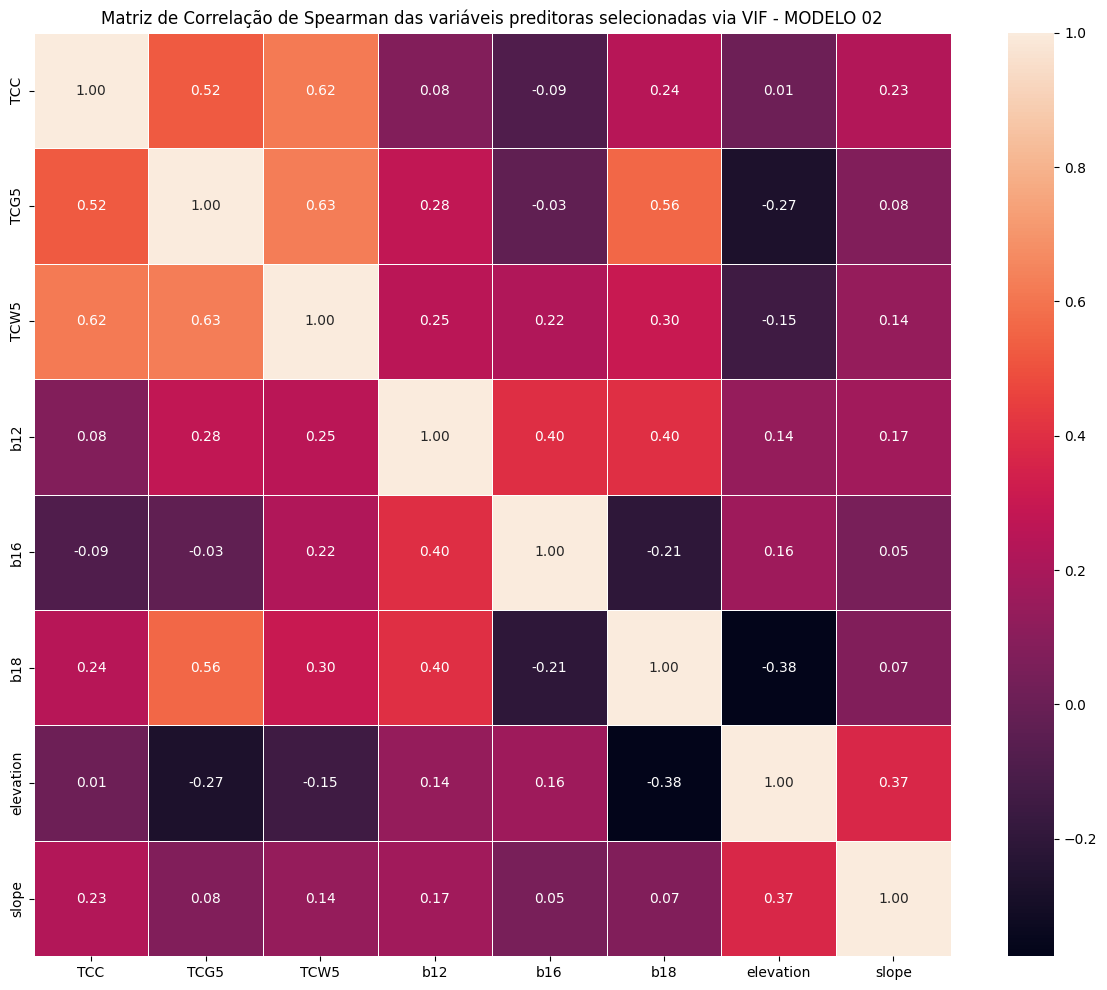

In [12]:
#Importar bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

#Correlação de Spearman das variáveis selecionadas
corrS_s = filtered_pvals_df.corr(method = 'spearman')

#Plotar gráfico
plt.figure(figsize=(12, 10))
sns.heatmap(corrS_s, annot = True, fmt=".2f", linewidths=0.5,); #fmt=".2f" reduz o número de casas, linewidths=0.5 ajusta espaçamento entre as células,
plt.title("Matriz de Correlação de Spearman das variáveis preditoras selecionadas via VIF - MODELO 02")
plt.tight_layout()
plt.savefig('M2_Spearman_heatmap_plot_variáveis_selecionadas_VIF.png')
plt.show()